# An example using Feature weighted ECM clustering
## With Seeds dataset  


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm_tridv import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_seeds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Seeds DS: 210 instances, 6 features


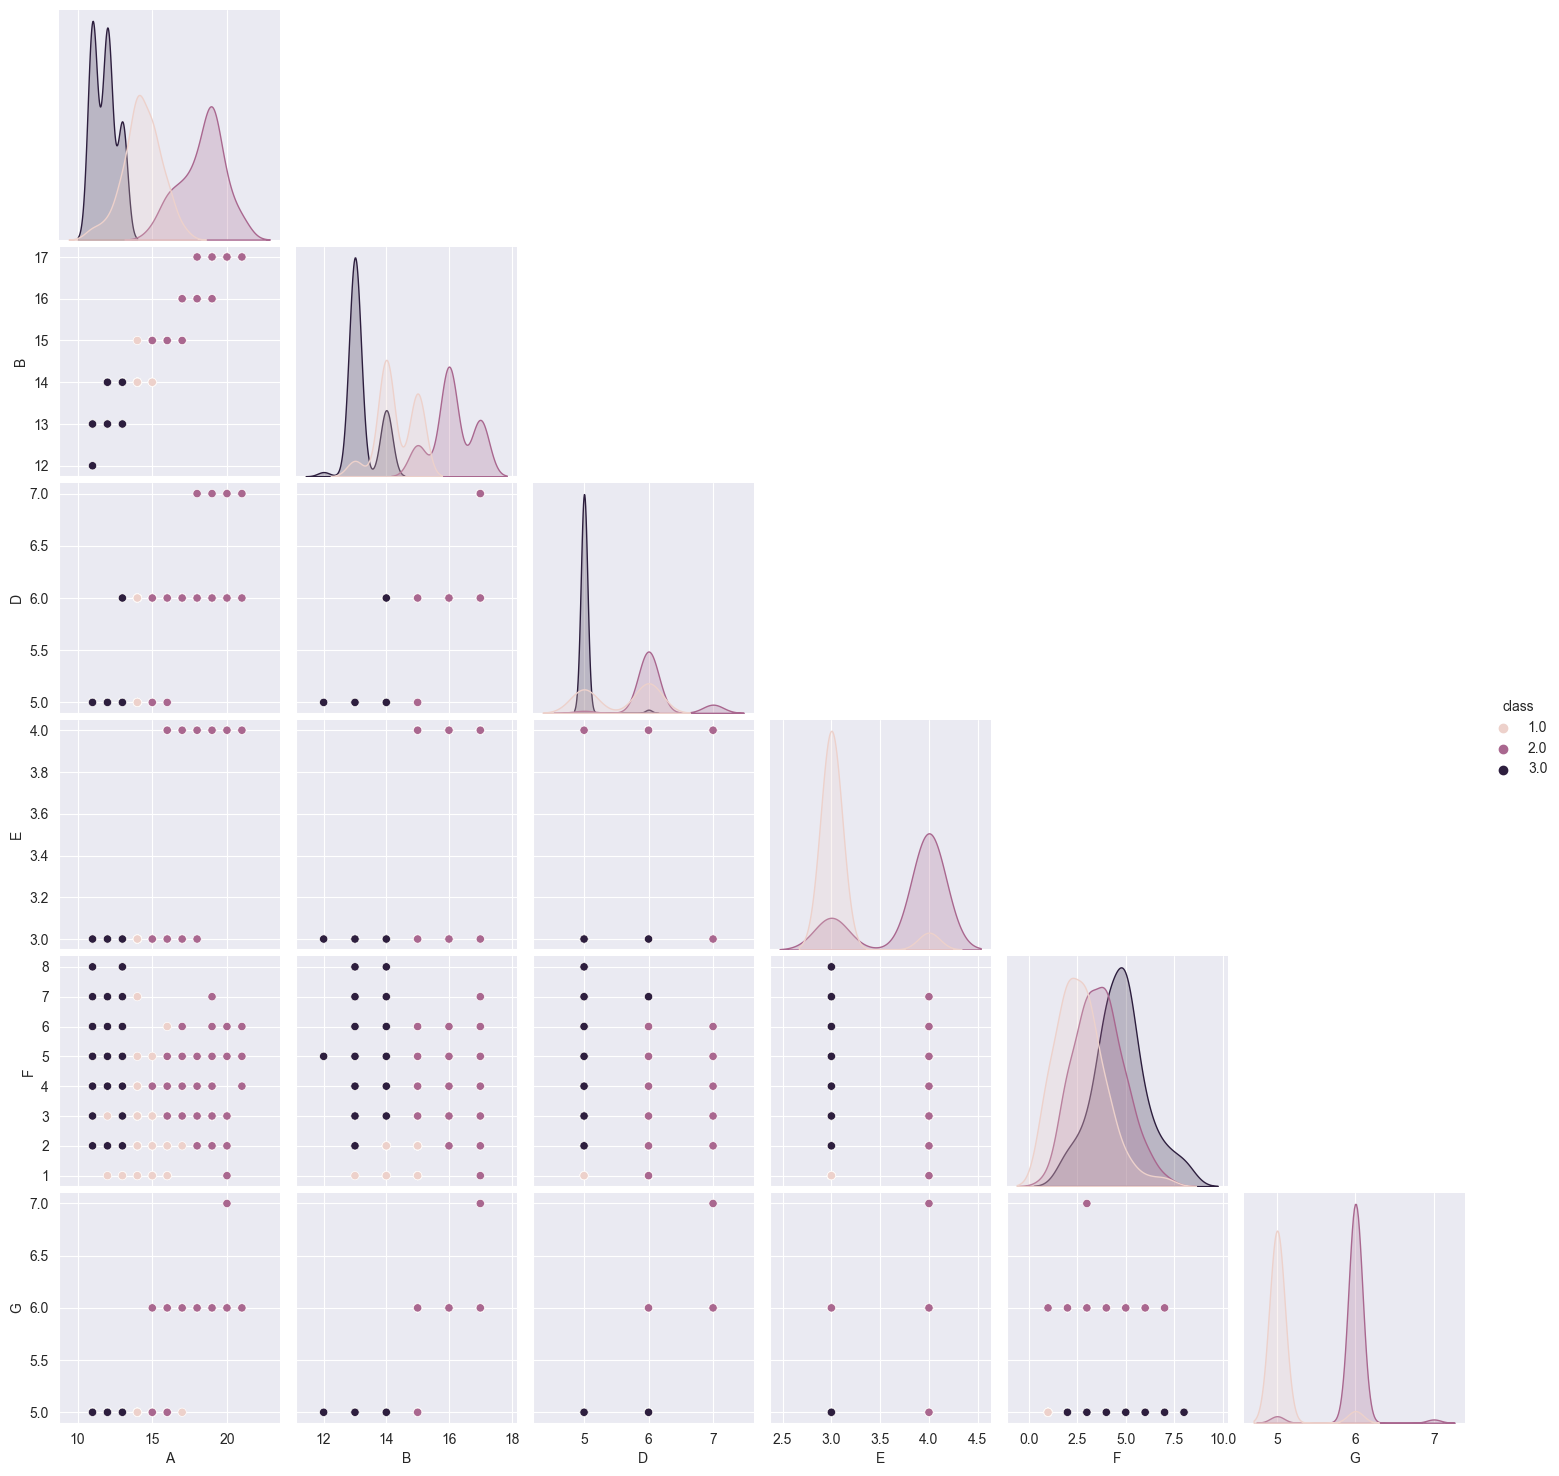

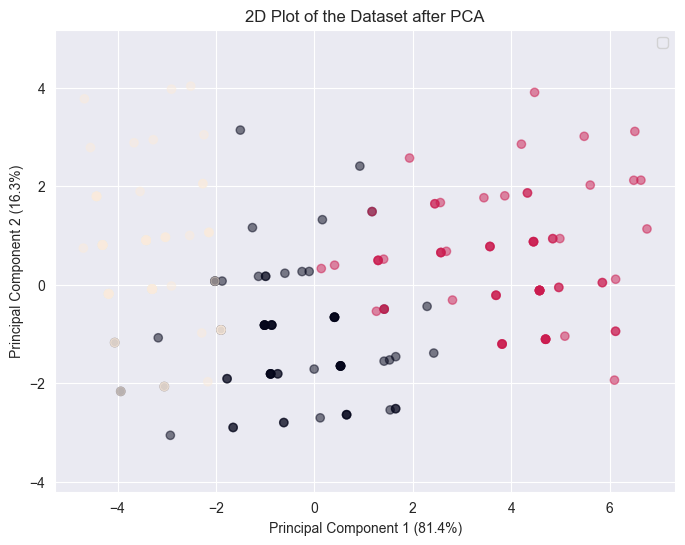

In [2]:
# fetch dataset
df = load_seeds()
df = df.drop(columns=['C'])
# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"Seeds DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 288.7625423323275]
[2, 280.8040432543499]
[3, 279.6786578492365]
[4, 279.36966772239714]
[5, 279.23173329600223]
[6, 279.14874575915]
[7, 279.0901449093686]
[8, 279.0457800540676]
[9, 279.01141567362333]
[10, 278.9847244925122]
[11, 278.9640943387224]
[12, 278.94826449408265]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.92024376775174]
[16, 278.91512437210434]
[17, 278.9113162813212]
[18, 278.90849492707395]
[19, 278.9064117181058]
[20, 278.9048779461728]
[21, 278.90375142992036]
[22, 278.90292571330235]
[  0.         278.90292571 278.90292571]
[1, 288.7625423323275]
[2, 280.8040432543499]
[3, 279.67865784923646]
[4, 279.36966772239714]
[5, 279.23173329600223]
[6, 279.14874575915]
[7, 279.0901449093685]
[8, 279.0457800540675]
[9, 279.0114156736232]
[10, 278.98472449251216]
[11, 278.9640943387224]
[12, 278.9482644940826]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.92024376775174]
[16, 278.9151243721044]
[17, 278.9113162813212]
[18, 278.90849492707395]
[19, 2

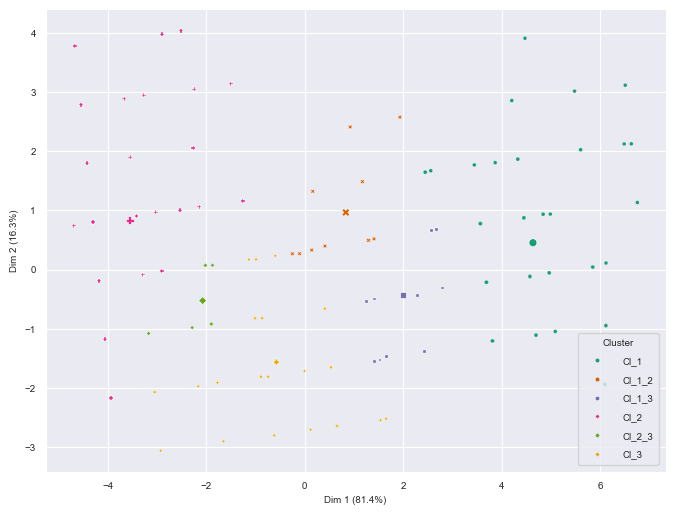

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.6828553072911945
Maximum Non-specificity value: 3.4819066595777297
Minimum Non-specificity value: 0.1154084163272781
Average Non-specificity value: 1.3417700273705513


In [4]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=5)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

#### <span style="color:red">There is an anonymous error with Upper bound/Lower bound plot function. There are some bugs in Python code of this function I think. I'll check it later</span>

## Feature weighted ECM (FW-ECM)

Intitial noise weights: [0.11977745 0.11587106 0.22378724 0.10747183 0.14321376 0.28987866]
Initial weight matrix: 
 [[0.19027256 0.20487336 0.01822468 0.39388961 0.12225636 0.07048343]
 [0.02323443 0.54709691 0.0983422  0.01787838 0.25489274 0.05855535]
 [0.16126389 0.0626899  0.01850898 0.45373572 0.27469958 0.02910194]]
[1, 6.3413871074857076]
[2, 5.666762189418023]
[3, 5.436936651857203]
[4, 5.3697918039844446]
[5, 5.361183778072934]
[6, 5.359070236316419]
[7, 5.3582293919700685]
[0.         5.35822939 5.35822939]
Initial weight matrix: 
 [[0.11682561 0.20709225 0.06339953 0.42474967 0.07305558 0.11487738]
 [0.03644612 0.51227132 0.12115322 0.04805849 0.19476114 0.08730971]
 [0.11676685 0.00163439 0.09422808 0.53113525 0.14737286 0.10886257]]
[1, 6.100812030968767]
[2, 5.84459063911859]
[3, 5.700534482420369]
[4, 5.582581339214243]
[5, 5.4785609459703535]
[6, 5.369063542383368]
[7, 5.222255212913034]
[8, 5.10556297991565]
[9, 5.077817489480445]
[10, 5.075426143575407]
[11, 5.075240

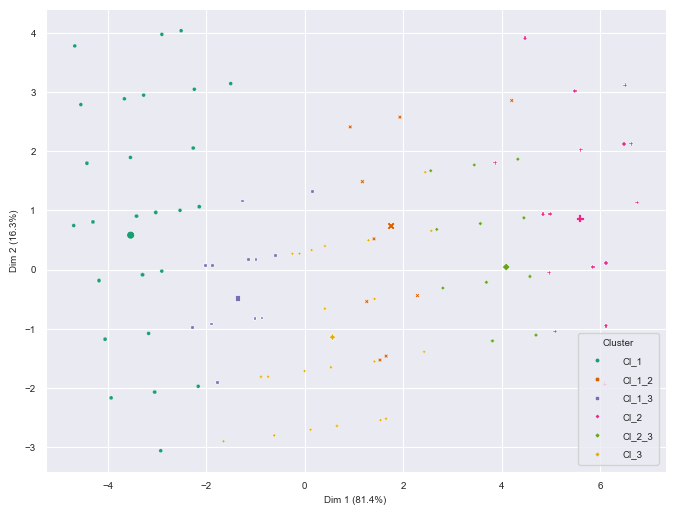

Weight matrix: 
 [[0.11682561 0.20709225 0.06339953 0.42474967 0.07305558 0.11487738]
 [0.03644612 0.51227132 0.12115322 0.04805849 0.19476114 0.08730971]
 [0.11676685 0.00163439 0.09422808 0.53113525 0.14737286 0.10886257]]
Covariance Matrix 1: [1.51563753 0.34830259 0.06495589 0.         2.03795777 0.03368083]
Covariance Matrix 2: [1.21867168 0.32017544 0.14536341 0.01754386 1.61152882 0.05325815]
Covariance Matrix 3: [1.14242424 0.39277389 0.21445221 0.05780886 1.27179487 0.16969697]


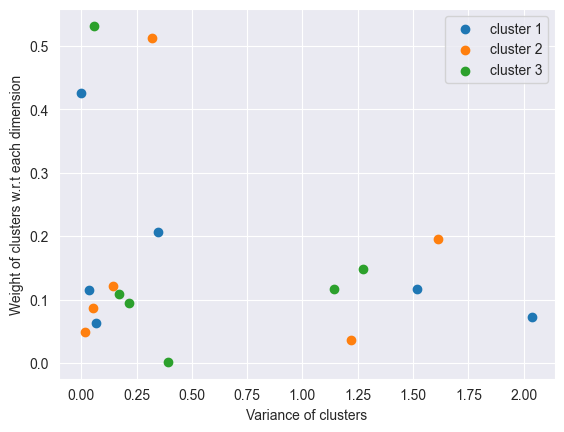

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.63103107566293 - J value: 5.07524080737992
Maximum Non-specificity value: 3.8931924833189413
Minimum Non-specificity value: 0.05166807466194132
Average Non-specificity value: 1.177026309443961


In [7]:
# Feature weighted ECM clustering
c = 3
model = fwecm(x=X, c=c, beta=2, alpha=1, delta=100, ntrials=5, epsi=1e-3)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Non-specificity equation
![test.png](../assets/Non-specificity.png)